# MNIST with PyTorch

In [ ]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
%matplotlib inline

num_samples = 1000
max_iter = 100

## Load and Understand the Data

First, let's load the MNIST dataset. Each image is a 28x28 grid of grayscale pixels.

Shape of one image: (28, 28)


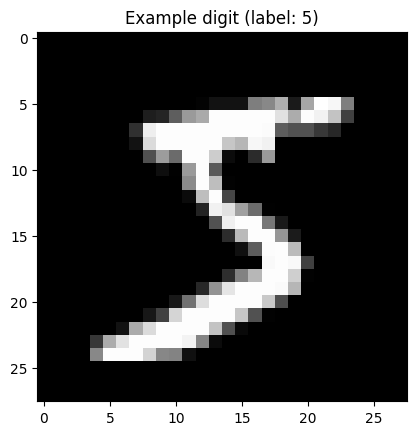

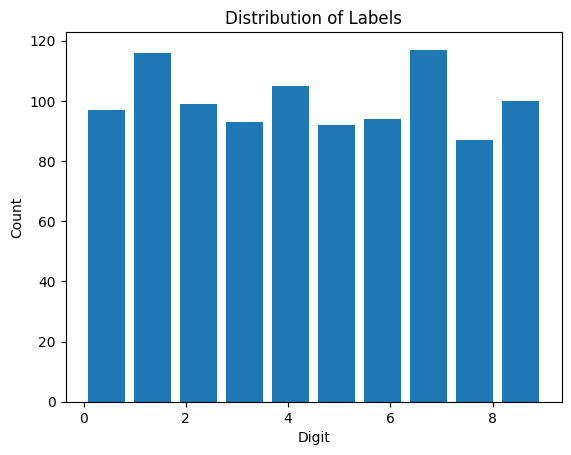

In [ ]:
# Load a subset of MNIST to start
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
x_full = mnist.data[:num_samples] / 255.0  # Scale pixel values to [0,1]
x_full = x_full.astype('float32')
y_full = mnist.target[:num_samples].astype(int)

# Look at the shape of one image
single_image = x_full[0].reshape(28, 28)  # Reshape back to 2D
plt.imshow(single_image, cmap='gray')
plt.title(f"Example digit (label: {y_full[0]})")
print("Shape of one image:", single_image.shape)

# Look at the distribution of labels
plt.figure()
plt.hist(y_full, bins=10, rwidth=0.8)
plt.title("Distribution of Labels")
plt.xlabel("Digit")
plt.ylabel("Count");

### Understanding Flattening

To use these images in our model, we need to "flatten" each 28x28 grid into a single vector of 784 numbers:

Shape after flattening: (784,)


Text(0, 0.5, 'Pixel value')

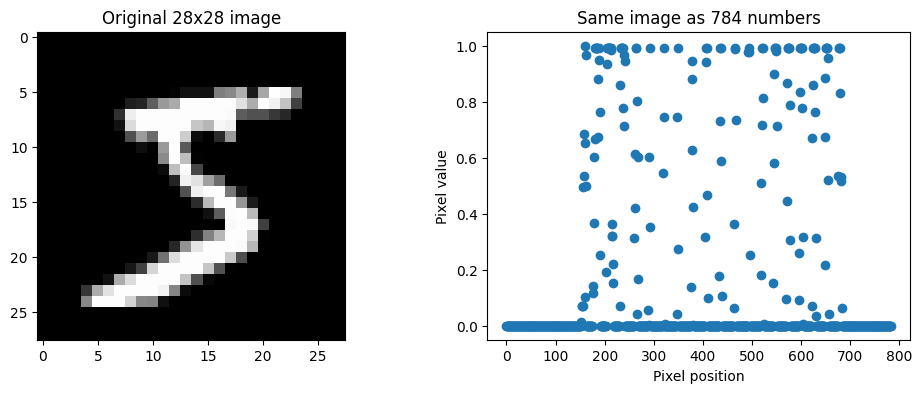

In [ ]:
# Demonstrate flattening on one image
flat_image = single_image.reshape(-1)  # -1 means "figure out this dimension"
print("Shape after flattening:", flat_image.shape)

# Visualize how flattening works
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.imshow(single_image, cmap='gray')
ax1.set_title("Original 28x28 image")
ax2.scatter(np.arange(784), flat_image)
ax2.set_title("Same image as 784 numbers")
ax2.set_xlabel("Pixel position")
ax2.set_ylabel("Pixel value")

Our dataset `x_full` was already flattened: each row is one flattened image:

In [ ]:
print("Full dataset shape:", x_full.shape)
print("Number of training examples:", x_full.shape[0])
print("Number of features per example:", x_full.shape[1])

Full dataset shape: (1000, 784)
Number of training examples: 1000
Number of features per example: 784


### Setting up data loaders

We'll split the data into training and validation sets, and set up PyTorch `DataLoader` objects to feed the data to our model.

In [ ]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

# Create DataLoader objects
train_data = TensorDataset(torch.tensor(x_train), torch.tensor(y_train))
val_data = TensorDataset(torch.tensor(x_val), torch.tensor(y_val))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

## Train an MLP to classify MNIST

We'll use PyTorch to train a simple multi-layer perceptron (MLP) to classify MNIST digits.

You should be able to piece this together from what we've done before!

Epoch 0: val_loss = 1.704
Epoch 1: val_loss = 1.014
Epoch 2: val_loss = 0.741
Epoch 3: val_loss = 0.648
Epoch 4: val_loss = 0.550
Epoch 5: val_loss = 0.494
Epoch 6: val_loss = 0.524
Epoch 7: val_loss = 0.486
Epoch 8: val_loss = 0.493
Epoch 9: val_loss = 0.469
Epoch 10: val_loss = 0.500
Epoch 11: val_loss = 0.488
Epoch 12: val_loss = 0.475
Epoch 13: val_loss = 0.474
Epoch 14: val_loss = 0.465
Epoch 15: val_loss = 0.470
Epoch 16: val_loss = 0.493
Epoch 17: val_loss = 0.495
Epoch 18: val_loss = 0.503
Epoch 19: val_loss = 0.521
Epoch 20: val_loss = 0.493
Epoch 21: val_loss = 0.509
Epoch 22: val_loss = 0.510
Epoch 23: val_loss = 0.530
Epoch 24: val_loss = 0.527
Epoch 25: val_loss = 0.524
Epoch 26: val_loss = 0.527
Epoch 27: val_loss = 0.527
Epoch 28: val_loss = 0.536
Epoch 29: val_loss = 0.533
Epoch 30: val_loss = 0.543
Epoch 31: val_loss = 0.542
Epoch 32: val_loss = 0.547
Epoch 33: val_loss = 0.553
Epoch 34: val_loss = 0.547
Epoch 35: val_loss = 0.560
Epoch 36: val_loss = 0.561
Epoch 37: v

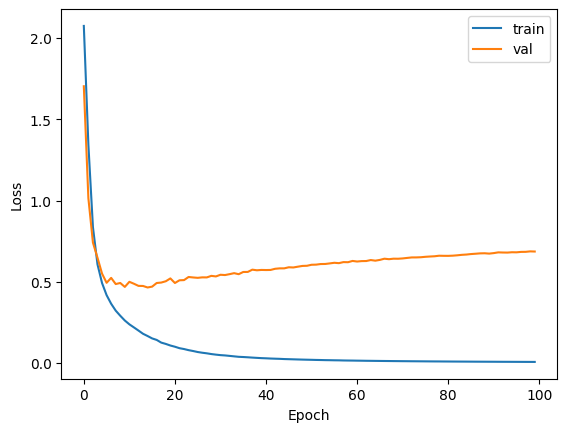

In [ ]:
# Define the model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.linear_1 = nn.Linear(in_features=..., out_features=..., bias=True)
        self.linear_2 = nn.Linear(in_features=..., out_features=..., bias=True)

    def forward(self, x):
        z1 = ...
        # internally, this is doing
        a1 = ...
        # or you could do
        a1 = z1.max(torch.tensor(0.0))
        # or
        a1 = torch.max(z1, torch.tensor(0.0))
        logits = ...
        return logits

# Instantiate the model
input_size = 784
hidden_size = ...
num_classes = ...

model = MLP(input_size, hidden_size, num_classes)
learning_rate = ...

# Train the model
train_losses = []
val_losses = []

for epoch in range(max_iter):
    train_loss = 0.
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Forward pass
        logits = ...
        # Compute the loss (remember that F.cross_entropy does the softmax internally)
        loss = F.cross_entropy(logits, y_batch)

        train_loss += loss.item()

        # Backward pass
        # Clear old gradients
        model.zero_grad()
        # Compute the gradients
        loss.backward()
        # Update the weights
        for param in model.parameters():
            param.data -= ... * param.grad
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Compute validation loss
    with torch.no_grad(): # Don't compute gradients, since we're not updating the model
        val_loss = 0.
        for x_val_batch, y_val_batch in val_loader:
            logits = ...
            val_loss += ...
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
    print(f"Epoch {epoch}: val_loss = {val_loss:.3f}")

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

## Data Augmentation

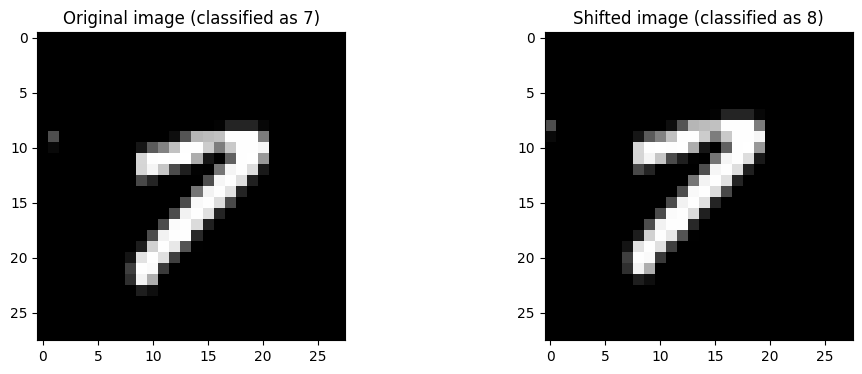

In [ ]:
# Shifting the image by one pixel shouldn't make a difference, right?
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = torch.roll(image, shifts=(dy, dx), dims=(0, 1))
    return shifted_image.reshape(-1)

def shift_images(image_batch, dx, dy):
    n_batch = image_batch.shape[0]
    return torch.roll(image_batch.reshape(n_batch, 28, 28), shifts=(dy, dx), dims=(1, 2)).reshape(n_batch, 784)

def classify(model, x):
    with torch.no_grad():
        logits = model(x)
        return logits.argmax(dim=-1)

# Visualize the shifted image
single_image = torch.tensor(x_train)[0]
shifted_image = shift_image(single_image, -1, -1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.imshow(single_image.reshape(28, 28), cmap='gray')
ax1.set_title(f"Original image (classified as {classify(model, single_image)})")
ax2.imshow(shifted_image.reshape(28, 28), cmap='gray')
ax2.set_title(f"Shifted image (classified as {classify(model, shifted_image)})");


Solution: shift the images while we're training!

Epoch 0: val_loss = 1.800
Epoch 1: val_loss = 1.218
Epoch 2: val_loss = 0.855
Epoch 3: val_loss = 0.701
Epoch 4: val_loss = 0.618
Epoch 5: val_loss = 0.563
Epoch 6: val_loss = 0.526
Epoch 7: val_loss = 0.512
Epoch 8: val_loss = 0.529
Epoch 9: val_loss = 0.499
Epoch 10: val_loss = 0.522
Epoch 11: val_loss = 0.483
Epoch 12: val_loss = 0.456
Epoch 13: val_loss = 0.466
Epoch 14: val_loss = 0.435
Epoch 15: val_loss = 0.442
Epoch 16: val_loss = 0.431
Epoch 17: val_loss = 0.476
Epoch 18: val_loss = 0.420
Epoch 19: val_loss = 0.417
Epoch 20: val_loss = 0.421
Epoch 21: val_loss = 0.391
Epoch 22: val_loss = 0.393
Epoch 23: val_loss = 0.413
Epoch 24: val_loss = 0.379
Epoch 25: val_loss = 0.384
Epoch 26: val_loss = 0.376
Epoch 27: val_loss = 0.399
Epoch 28: val_loss = 0.425
Epoch 29: val_loss = 0.403
Epoch 30: val_loss = 0.380
Epoch 31: val_loss = 0.410
Epoch 32: val_loss = 0.407
Epoch 33: val_loss = 0.383
Epoch 34: val_loss = 0.387
Epoch 35: val_loss = 0.399
Epoch 36: val_loss = 0.430
Epoch 37: v

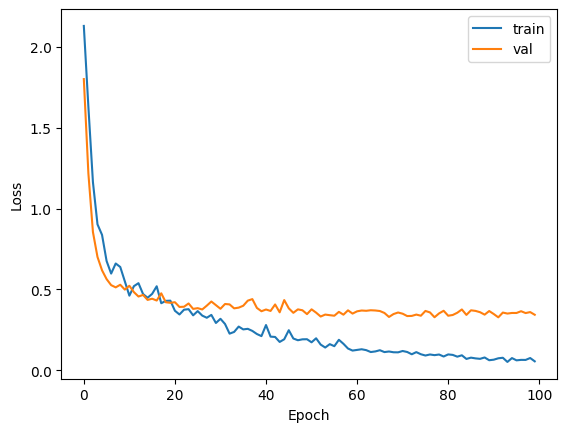

In [ ]:

model = MLP(input_size, hidden_size, num_classes)
learning_rate = 0.1

# Training loop!
train_losses = []
val_losses = []

for epoch in range(max_iter):
    train_loss = 0.
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Apply random shifts to the images. Pick a shift for this batch.
        shift_x = torch.randint(-1, 2, size=(1,))
        shift_y = torch.randint(-1, 2, size=(1,))
        x_batch_shifted = shift_images(x_batch, shift_x, shift_y)

        # Forward pass
        logits = ...
        # Compute the loss
        loss = F.cross_entropy(logits, y_batch)

        train_loss += loss.item()

        # Backward pass
        # Clear old gradients
        model.zero_grad()
        # Compute the gradients
        loss.backward()
        # Update the weights
        for param in model.parameters():
            param.data -= ... * param.grad
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Compute validation loss
    with torch.no_grad():
        val_loss = 0.
        for x_val_batch, y_val_batch in val_loader:
            logits = ...
            val_loss += ...
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
    print(f"Epoch {epoch}: val_loss = {val_loss:.3f}")

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()